###*Sayantan Mukherjee   60009220131*

#*Understanding Elements of Seasonality*

In [ ]:
import pandas as pd
df=pd.read_excel(r'/content/istambul_stock_exchange.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date,ISE,ISED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


#*Multiple Box Plot*

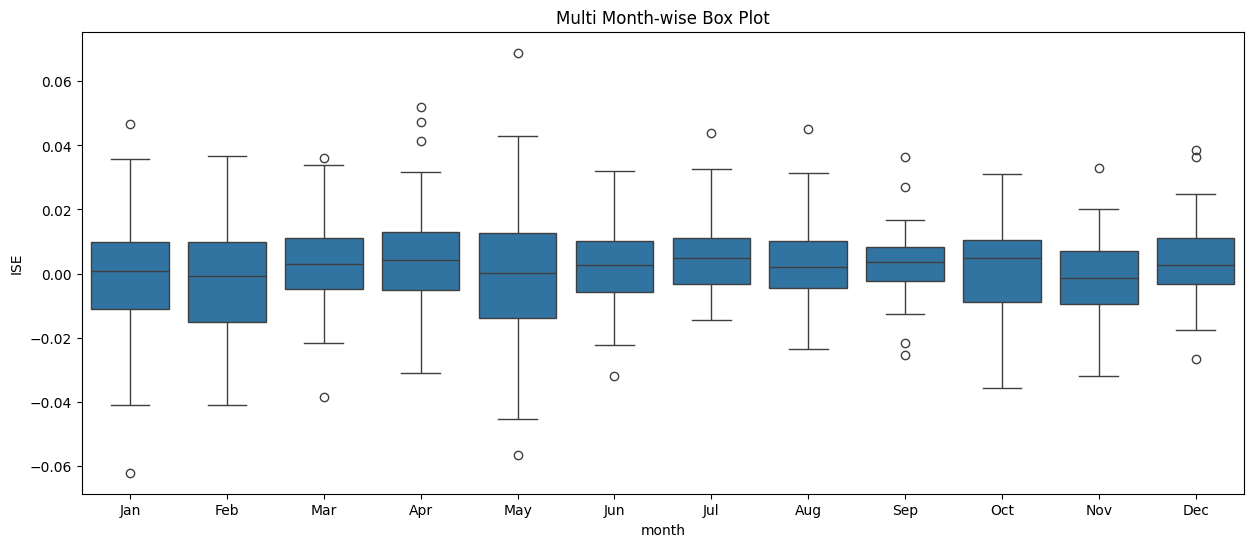

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/istambul_stock_exchange.xlsx',parse_dates=True)
df['month'] = df['date'].dt.strftime('%b') ##%b	Month name ( Oct, Nov) https://www.plus2net.com/python/pandas-dt-strftime.php
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='ISE', data=df).set_title("Multi Month-wise Box Plot")
plt.show()


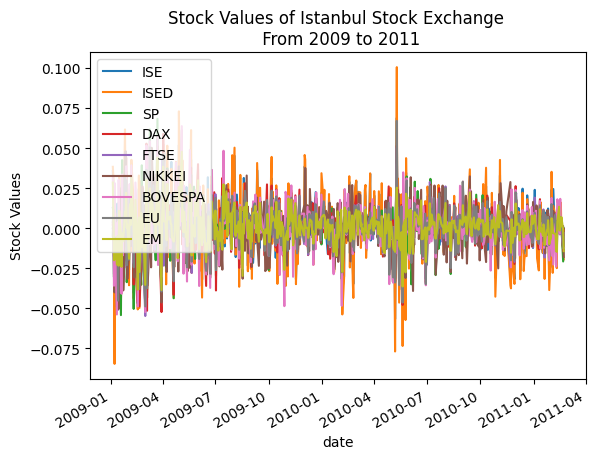

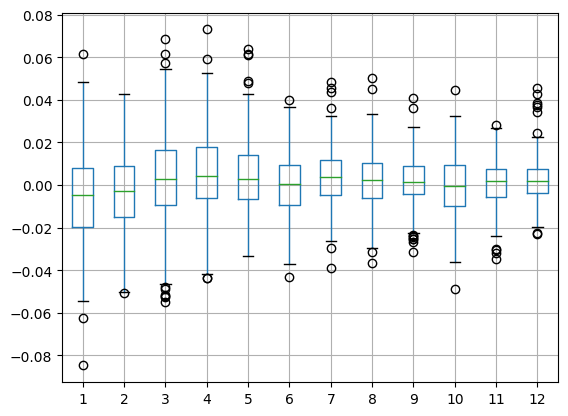

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Read the time series data

series   =  pd.read_excel('/content/istambul_stock_exchange.xlsx', header = 0, index_col = 0, parse_dates = True)
series.plot()
plt.ylabel('Stock Values')
plt.title('Stock Values of Istanbul Stock Exchange \n From 2009 to 2011')
plt.show()
months         = pd.DataFrame()
one_year       = series[series.index.year==2009]
groups         = one_year.groupby(pd.Grouper(freq='M'))
# Create a list to store monthly data
monthly_data = []
for _, group in groups:
    monthly_data.append(group.values.flatten())  # Flatten the values for each month

months = pd.DataFrame(monthly_data).transpose()
months.columns = range(1,13)  # Now assign the column names
months.boxplot()
plt.show()

#*Auto Correlation Plot*

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

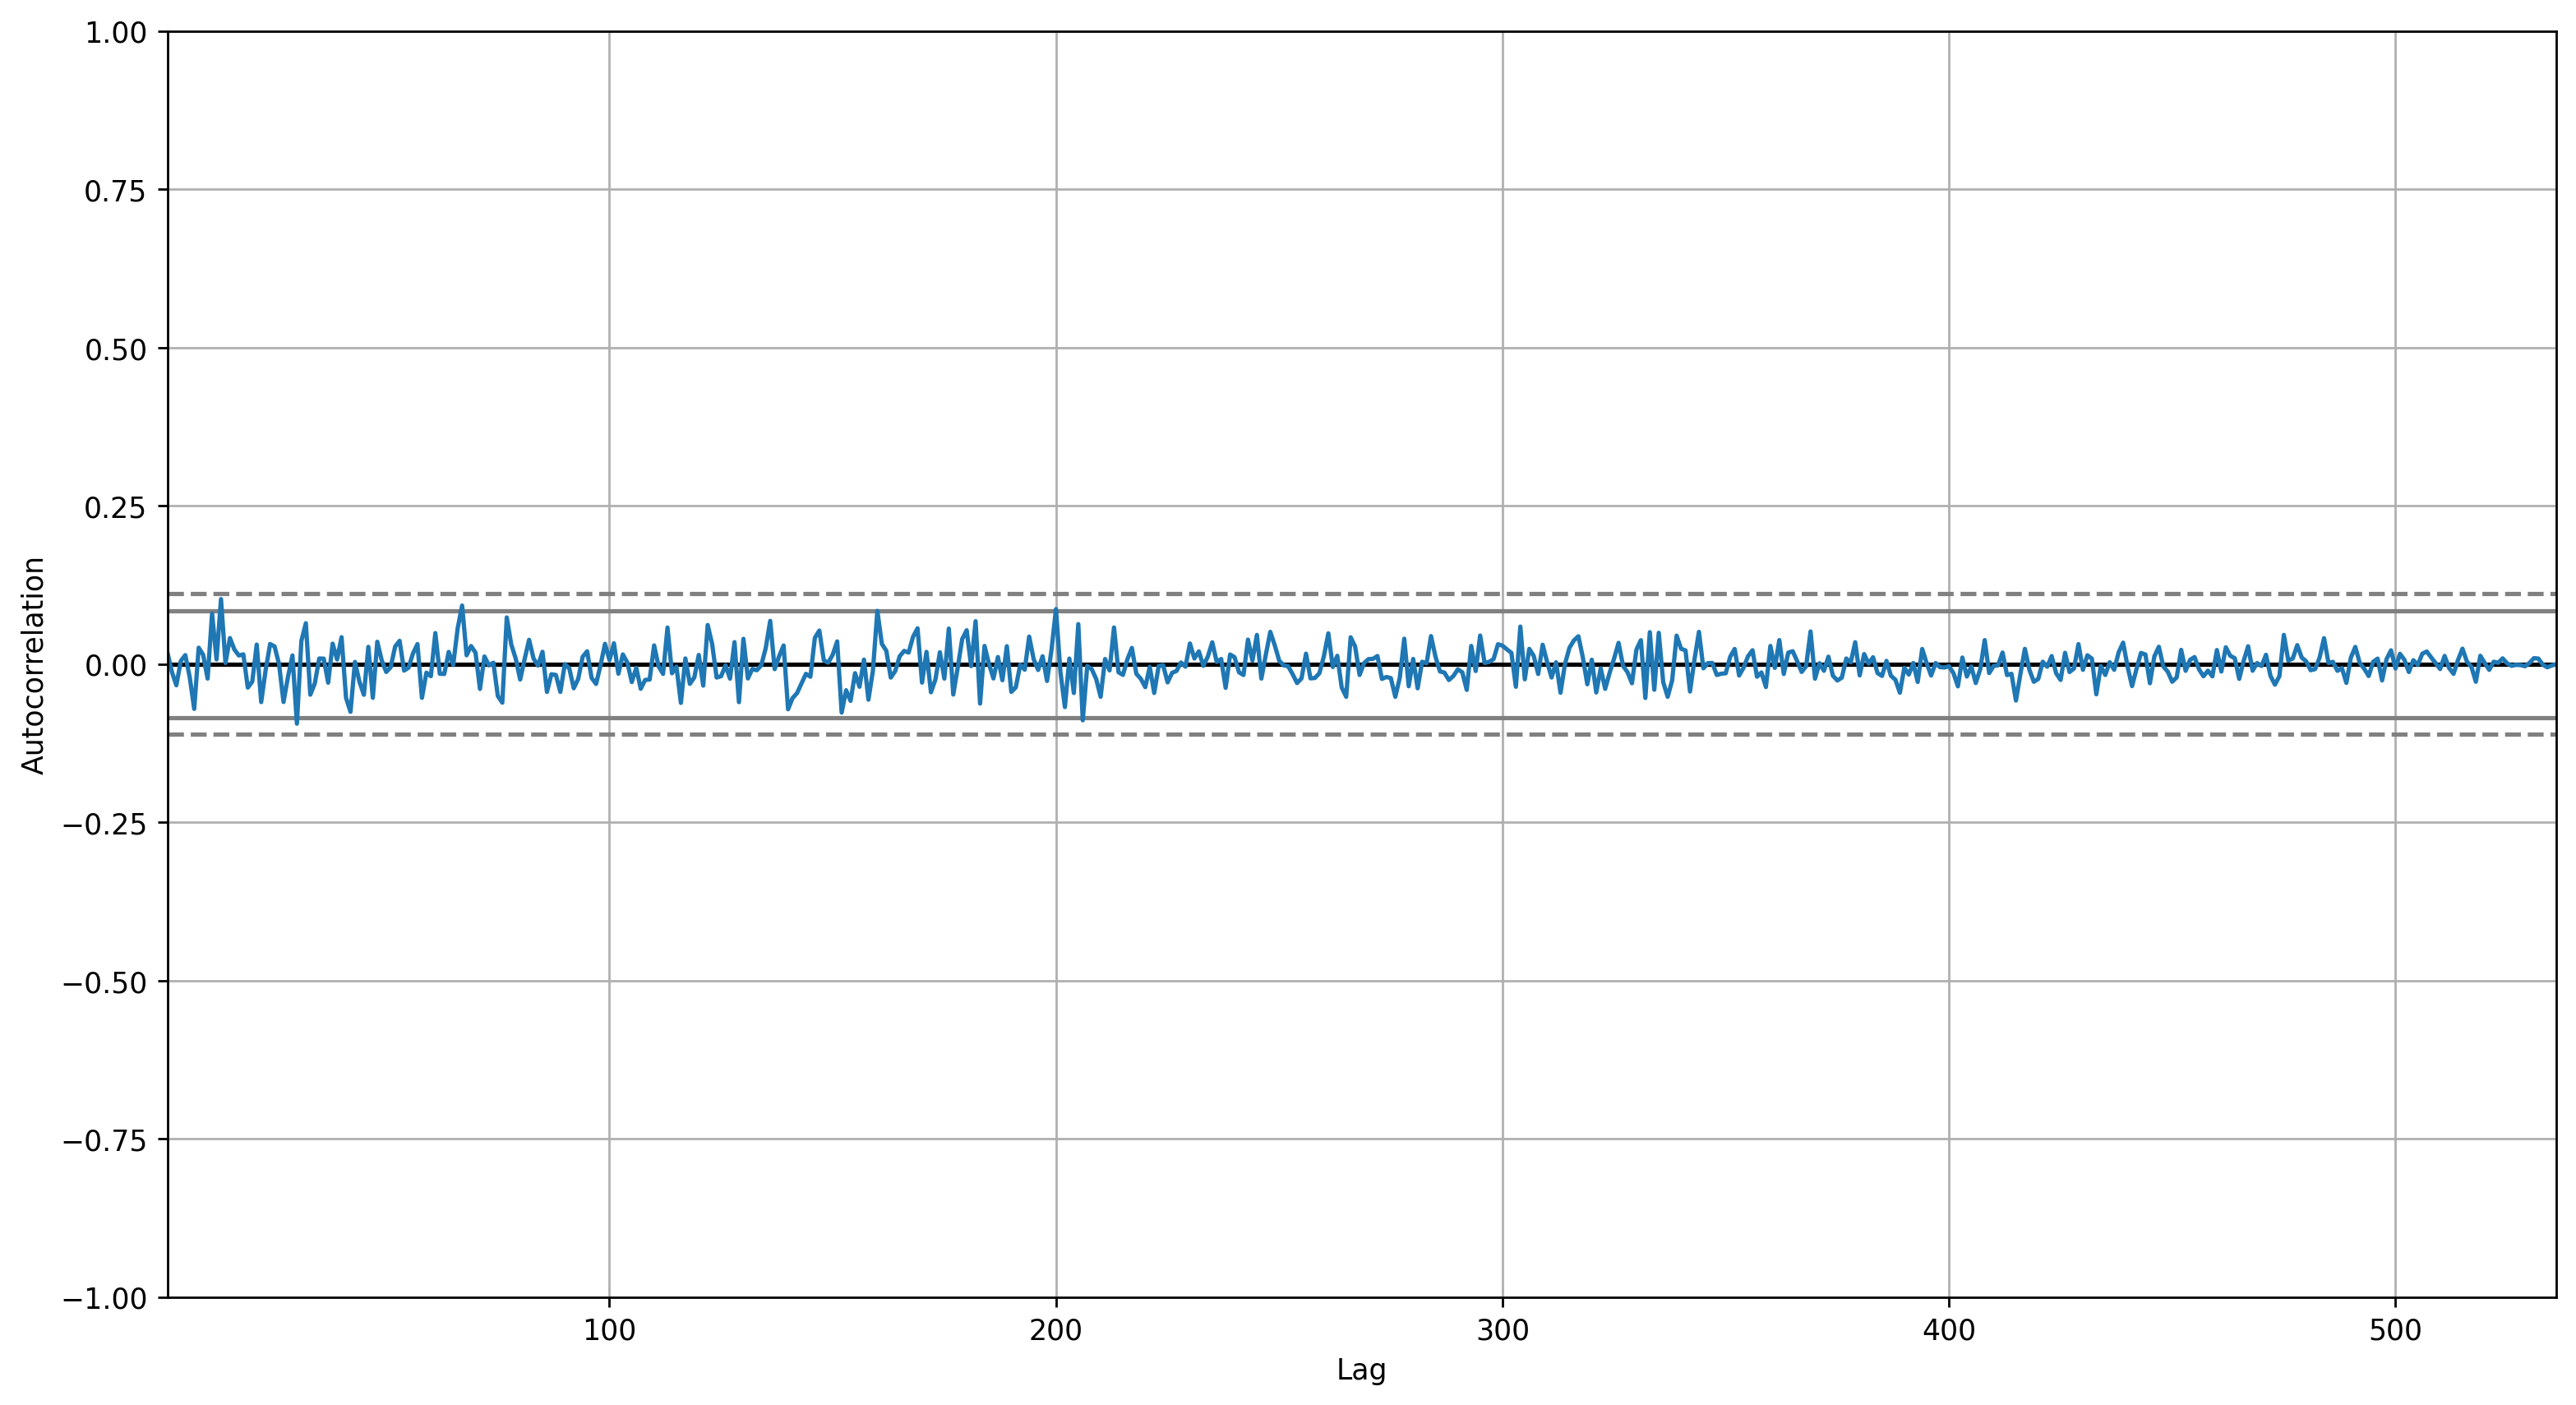

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel(r'/content/istambul_stock_exchange.xlsx', index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':250}) #You can control default settings for plot dimensions, line widths, color schemes, font sizes, and more
autocorrelation_plot(df.ISE.tolist())

#*Seasonal Decompose*

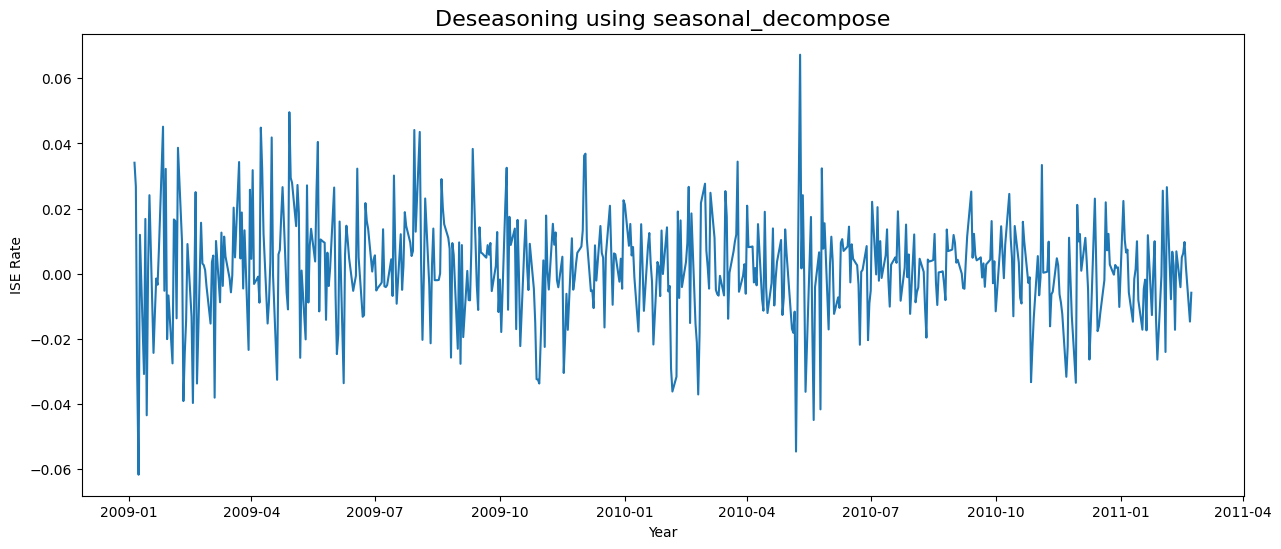

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/istambul_stock_exchange.xlsx', index_col=0,parse_dates=True)

# Infer the frequency of the time series
df = df.asfreq(pd.infer_freq(df.index))

# Handle missing values (e.g., fill with linear interpolation)
df['ISE'].interpolate(method='linear', inplace=True)

# Decompose the time series, now that a frequency has been set for the index and missing values are handled
result_mul = seasonal_decompose(df['ISE'], model='additive')
deseason = df['ISE'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('ISE Rate')
plt.show()

#*Understanding Time Series Components from Scratch*
Trend, Seasonality and Noise

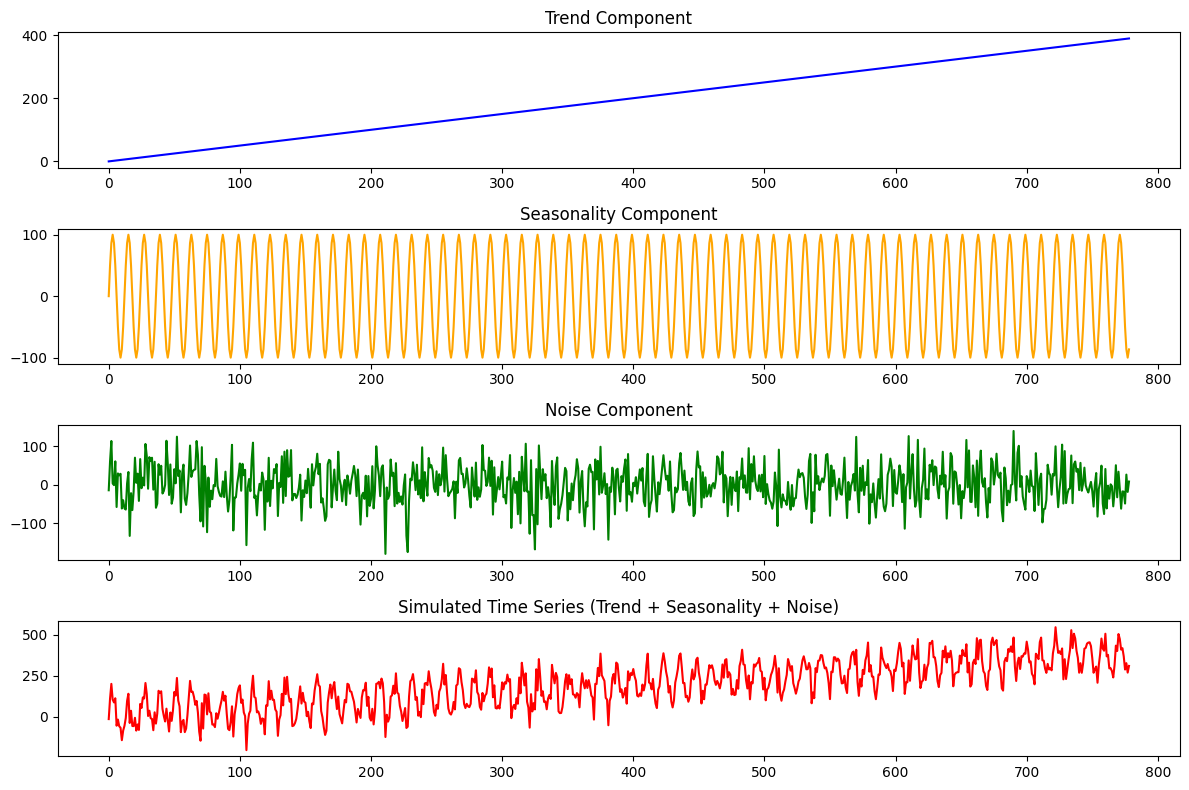

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_series_data = df['ISE'].values
time_index = np.arange(len(time_series_data))

#1. Creating the Trend Component
trend = 0.5 * time_index

# 2. Adding Seasonality Component
# We'll use a sine wave to simulate seasonality;
seasonality = 100 * np.sin(2 * np.pi * time_index / 12)

# 3. Adding Noise Component
# We'll simulate noise with a normal distribution;
noise = np.random.normal(scale=50, size=len(time_index))

# 4. Combine Trend, Seasonality, and Noise
simulated_series = trend + seasonality + noise

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_index, trend, label='Trend', color='blue')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(time_index, seasonality, label='Seasonality', color='orange')
plt.title('Seasonality Component')

plt.subplot(4, 1, 3)
plt.plot(time_index, noise, label='Noise', color='green')
plt.title('Noise Component')

plt.subplot(4, 1, 4)
plt.plot(time_index, simulated_series, label='Simulated Series', color='red')
plt.title('Simulated Time Series (Trend + Seasonality + Noise)')

plt.tight_layout()
plt.show()


#*Facebook Stock Market Scenario*

In [ ]:
import pandas as pd
df2=pd.read_csv(r'/content/FB.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


#*Multiple Box Plot*

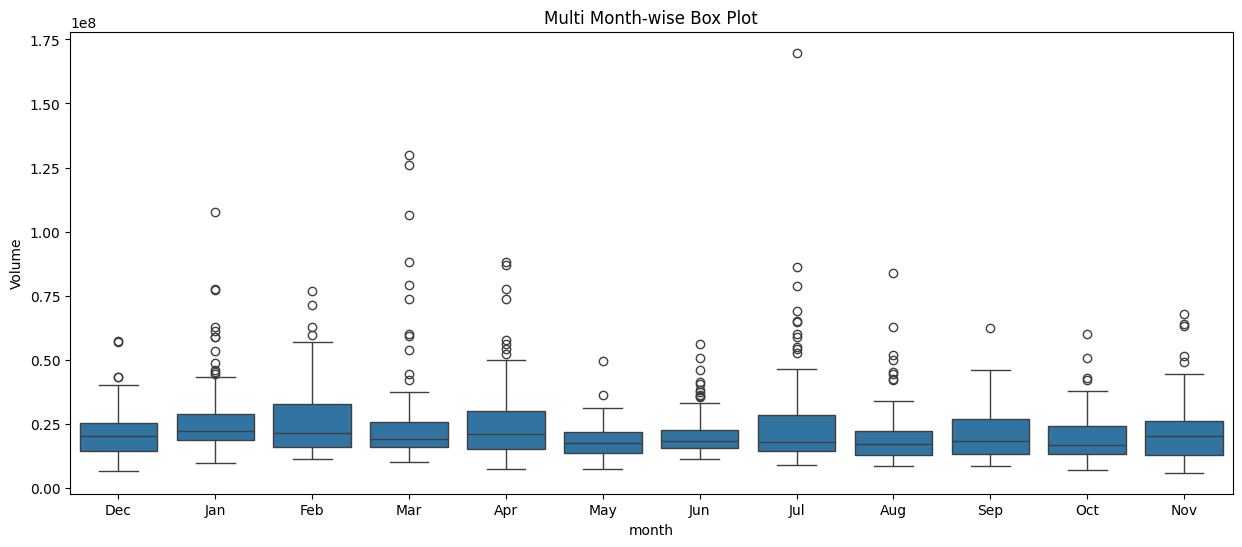

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv(r'/content/FB.csv')
# Parse the 'Date' column as datetime objects upon import
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%b') ##%b	Month name ( Oct, Nov) https://www.plus2net.com/python/pandas-dt-strftime.php
df['year'] = [d.year for d in df.Date] # Assuming 'DAXate' was a typo and you meant 'Date'
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Volume', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

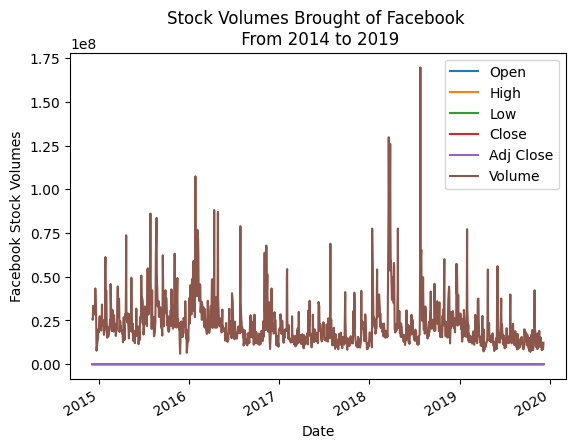

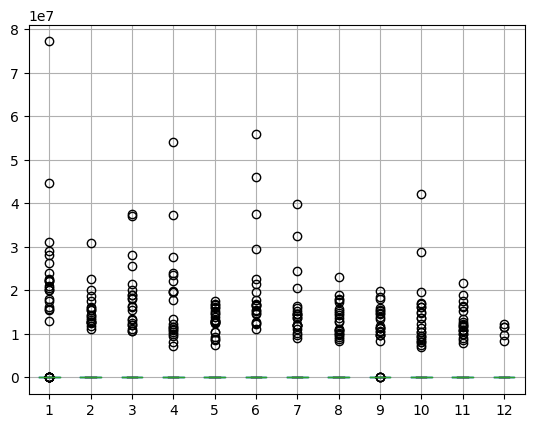

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Read the time series data

series   =  pd.read_csv('/content/FB.csv', header = 0, index_col = 0, parse_dates = True)
series.plot()
plt.ylabel('Facebook Stock Volumes')
plt.title('Stock Volumes Brought of Facebook \n From 2014 to 2019')
plt.show()
months         = pd.DataFrame()
one_year       = series[series.index.year==2019]
groups         = one_year.groupby(pd.Grouper(freq='M'))
# Create a list to store monthly data
monthly_data = []
for _, group in groups:
    monthly_data.append(group.values.flatten())  # Flatten the values for each month

months = pd.DataFrame(monthly_data).transpose()
months.columns = range(1,13)  # Now assign the column names
months.boxplot()
plt.show()

#*Auto-Correlation Plots*

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

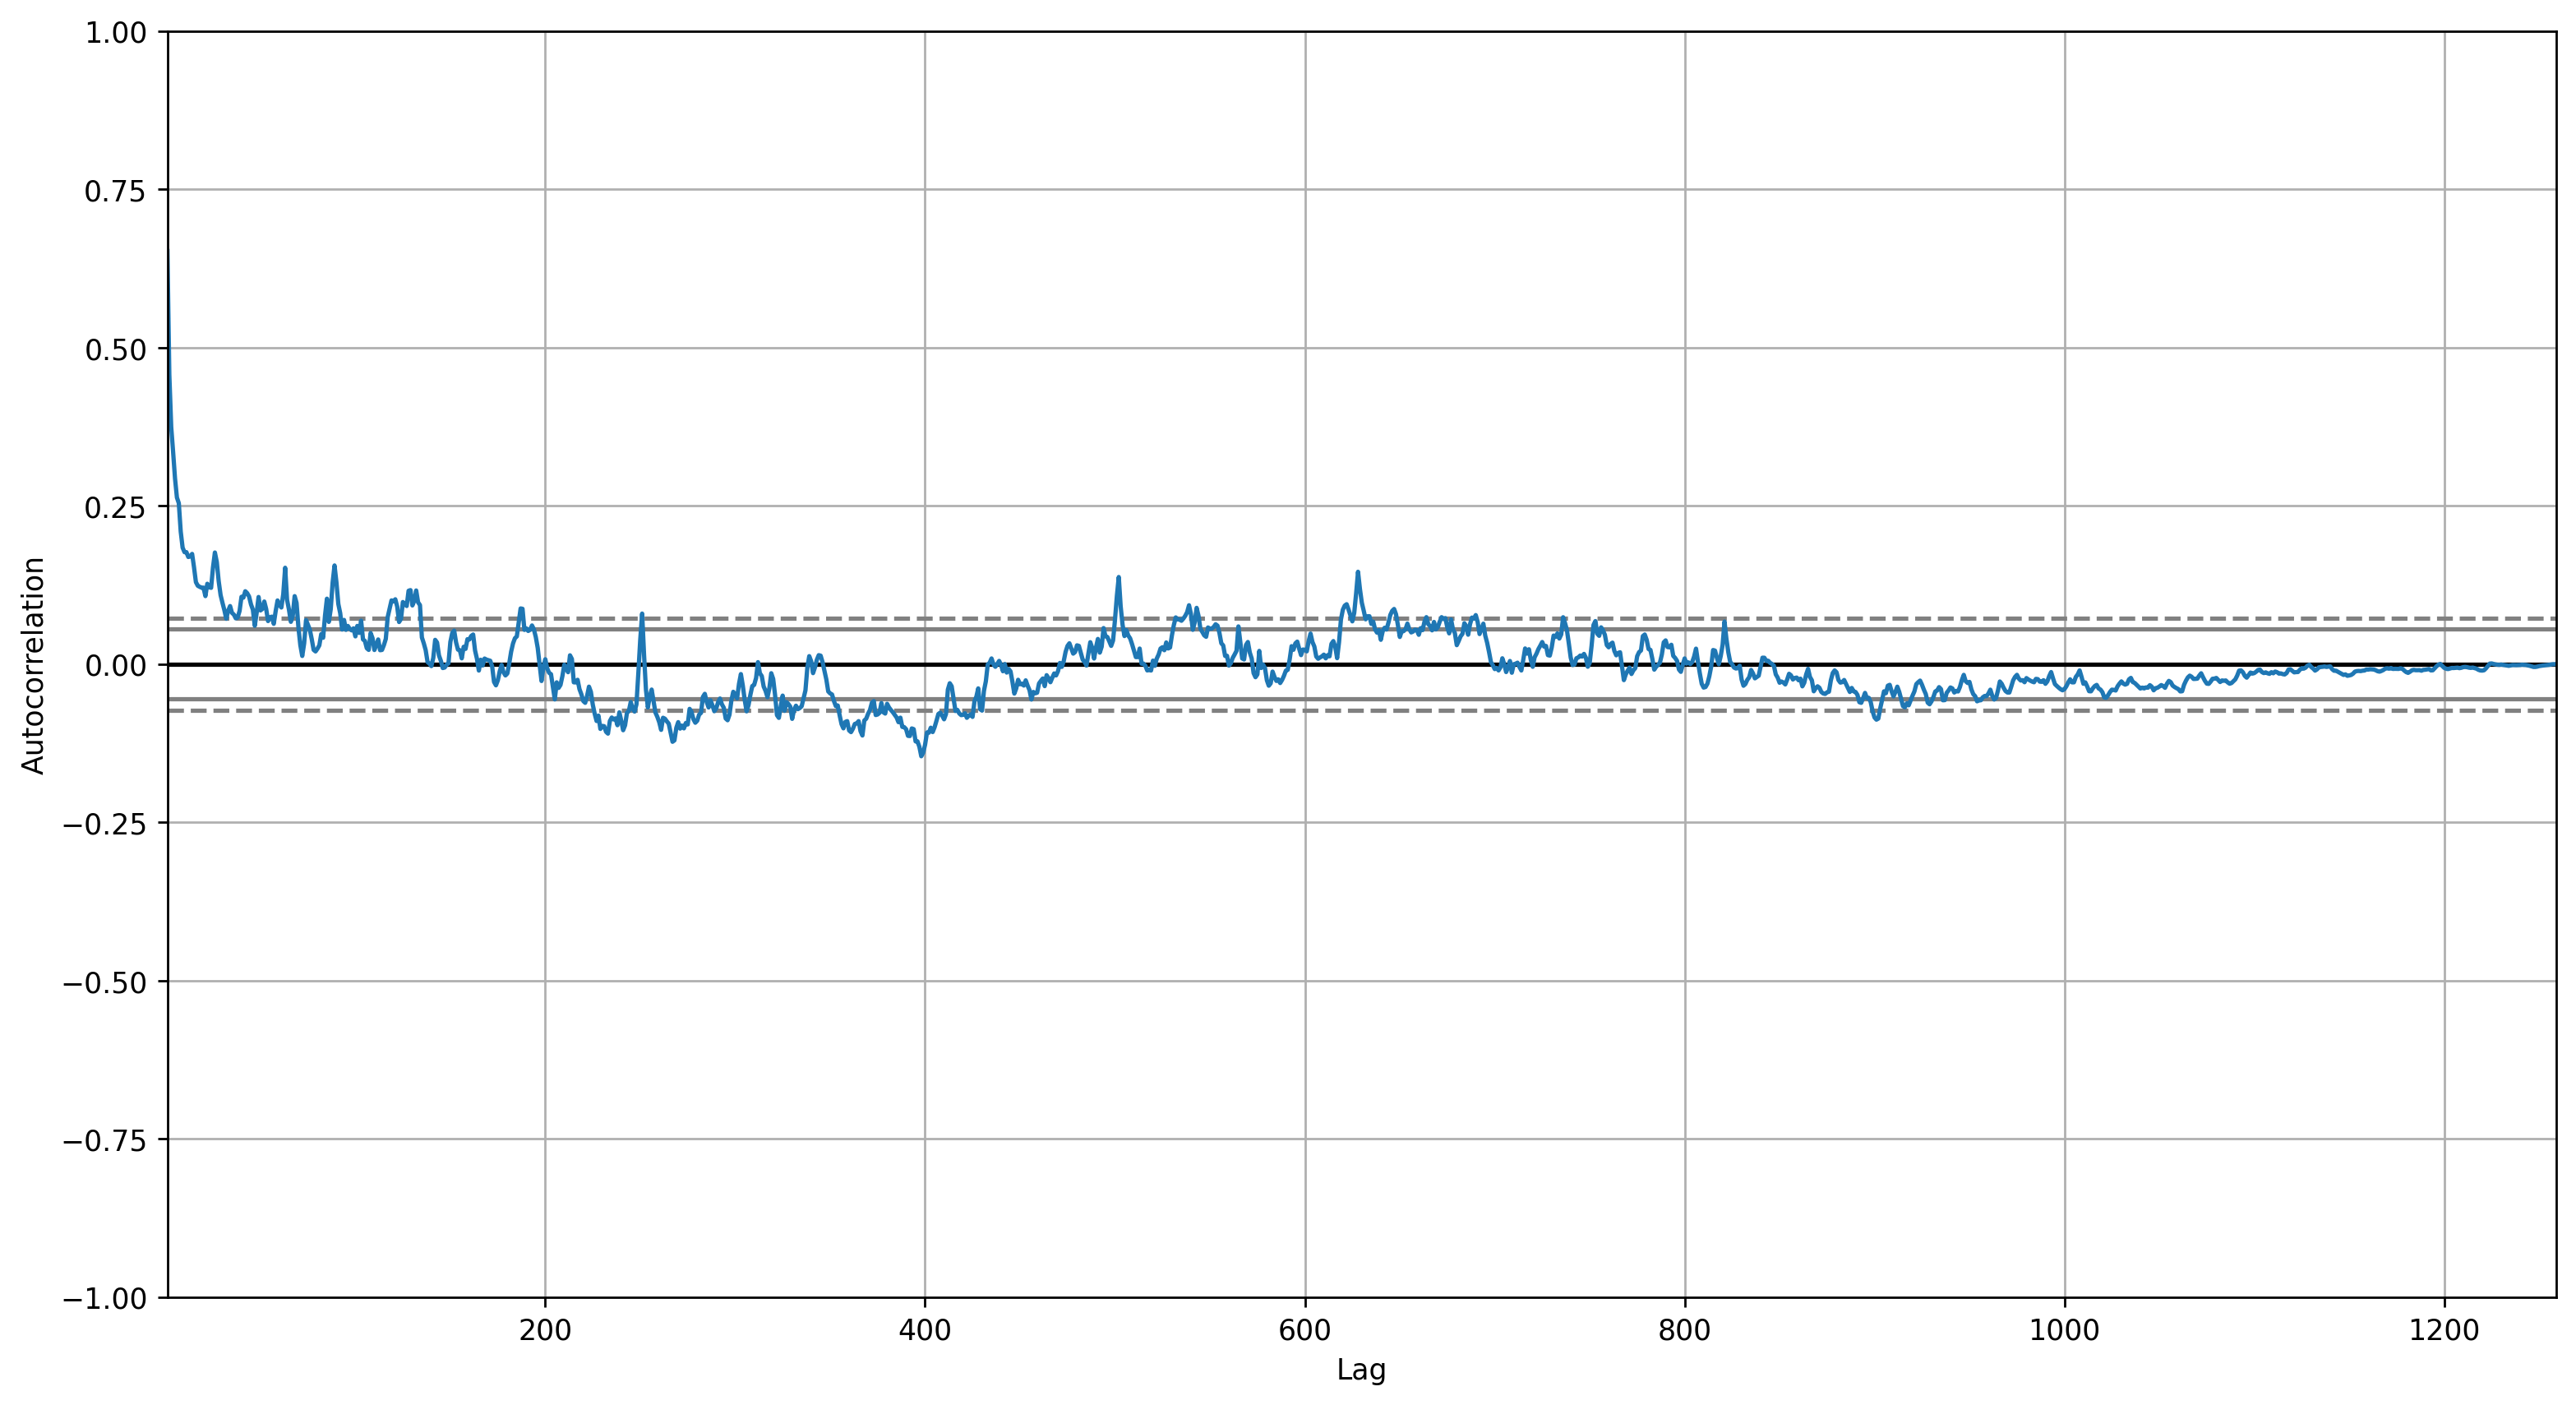

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'/content/FB.csv', index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':250}) #You can control default settings for plot dimensions, line widths, color schemes, font sizes, and more
autocorrelation_plot(df.Volume.tolist())

#*Seasonal Decomposition*

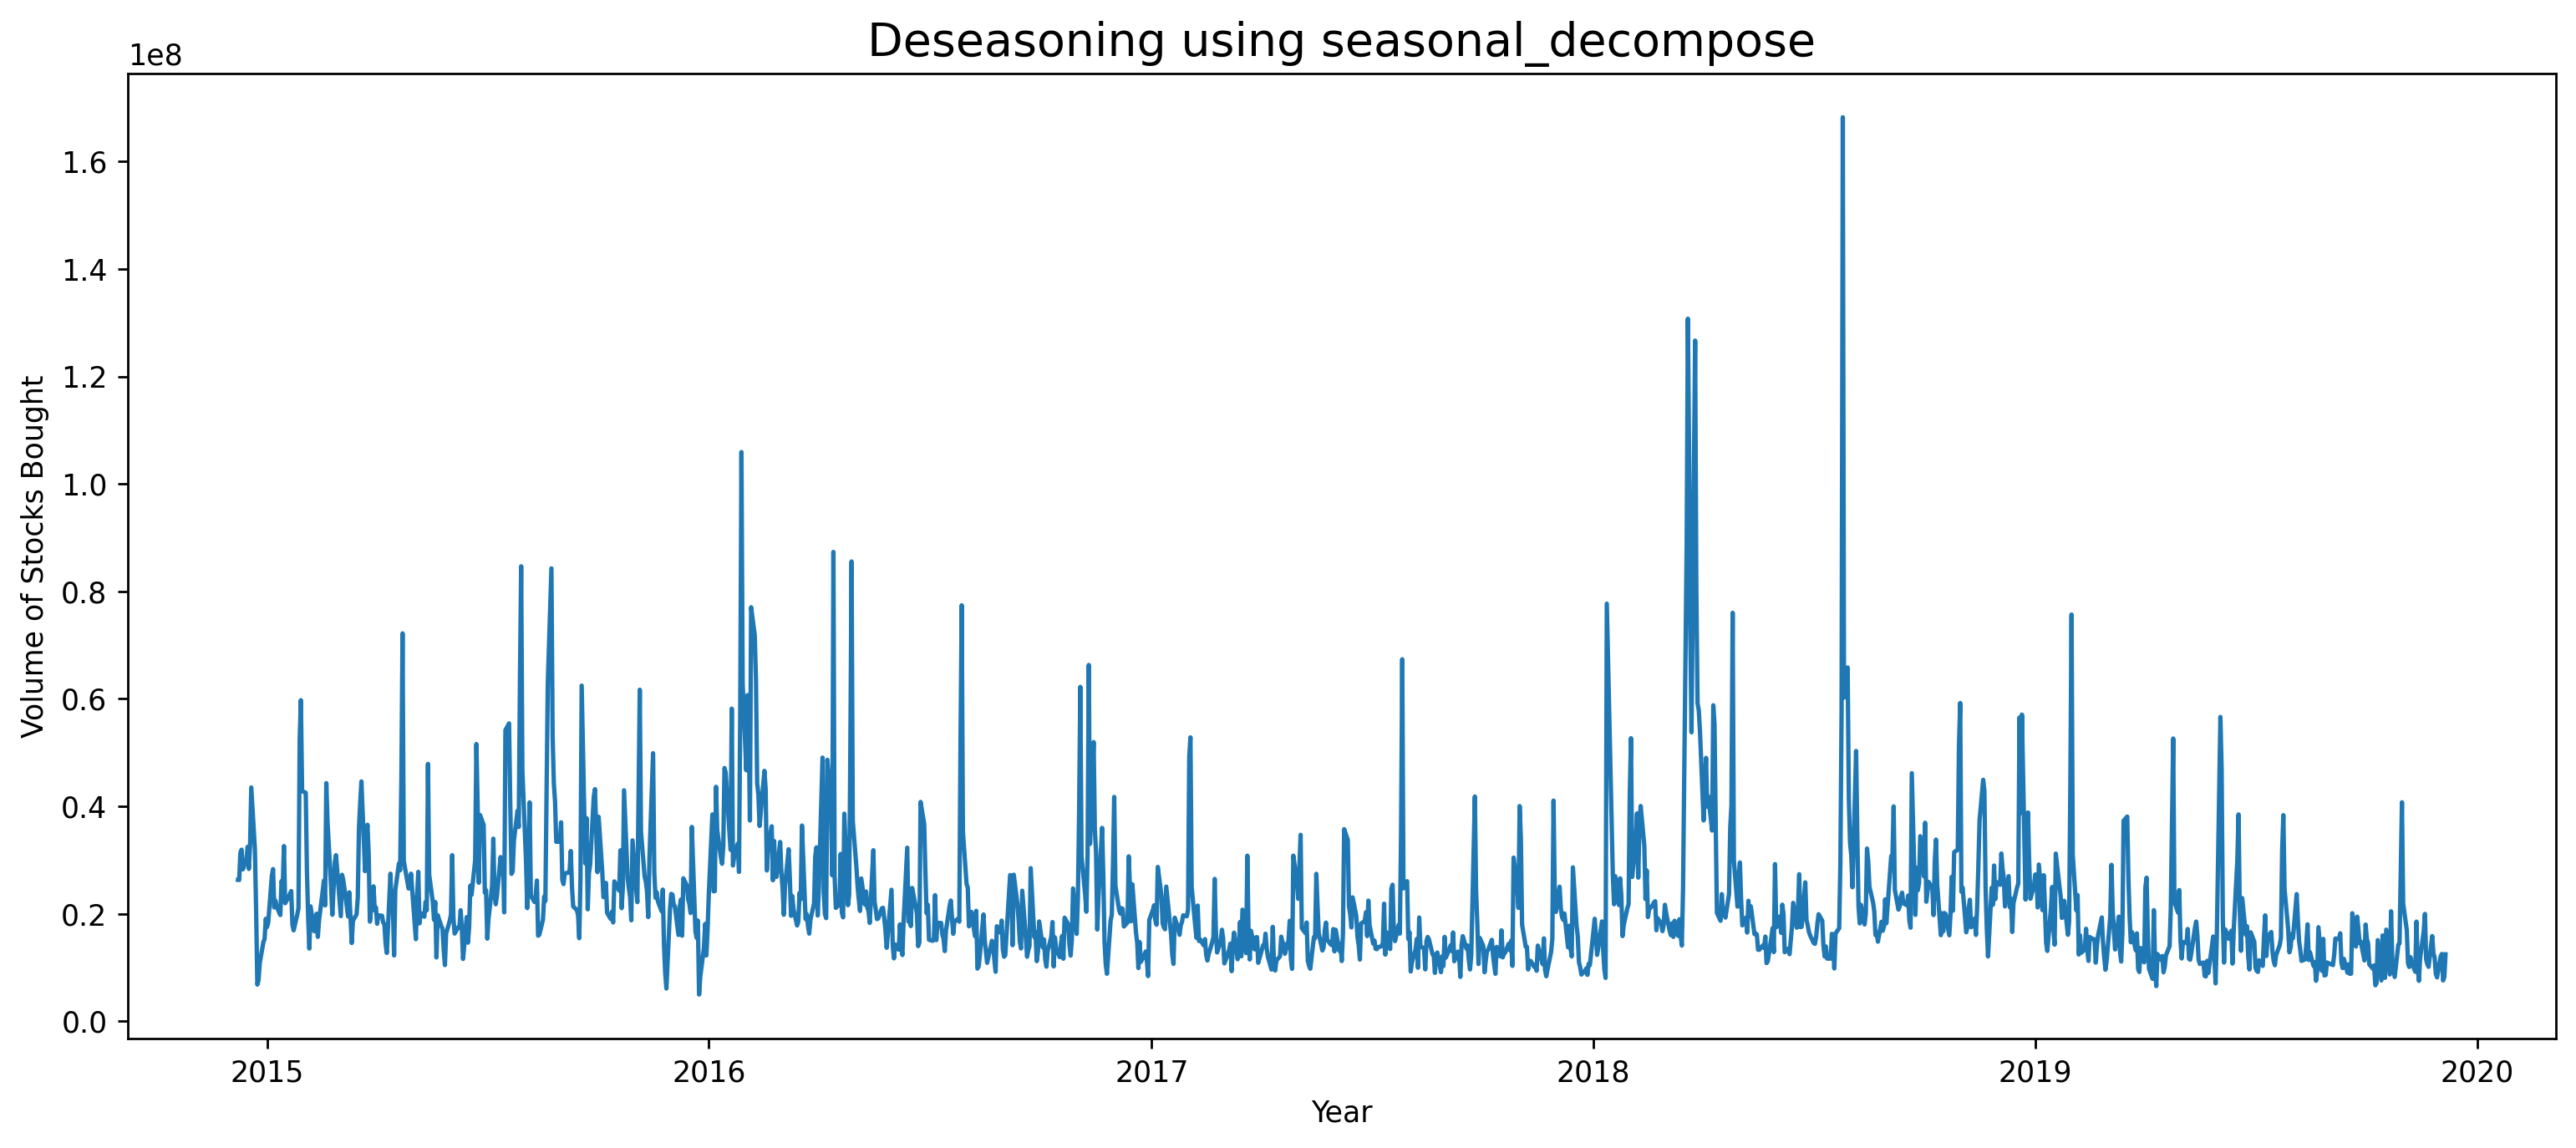

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv(r'/content/FB.csv', index_col=0,parse_dates=True)

# Infer the frequency of the time series
df = df.asfreq(pd.infer_freq(df.index))

# Handle missing values (e.g., fill with linear interpolation)
df['Volume'].interpolate(method='linear', inplace=True)

# Decompose the time series, now that a frequency has been set for the index and missing values are handled
result_mul = seasonal_decompose(df['Volume'], model='additive')
deseason = df['Volume'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Volume of Stocks Bought')
plt.show()

#*Simulated Time Series with Trend, Seasonality and Noise*

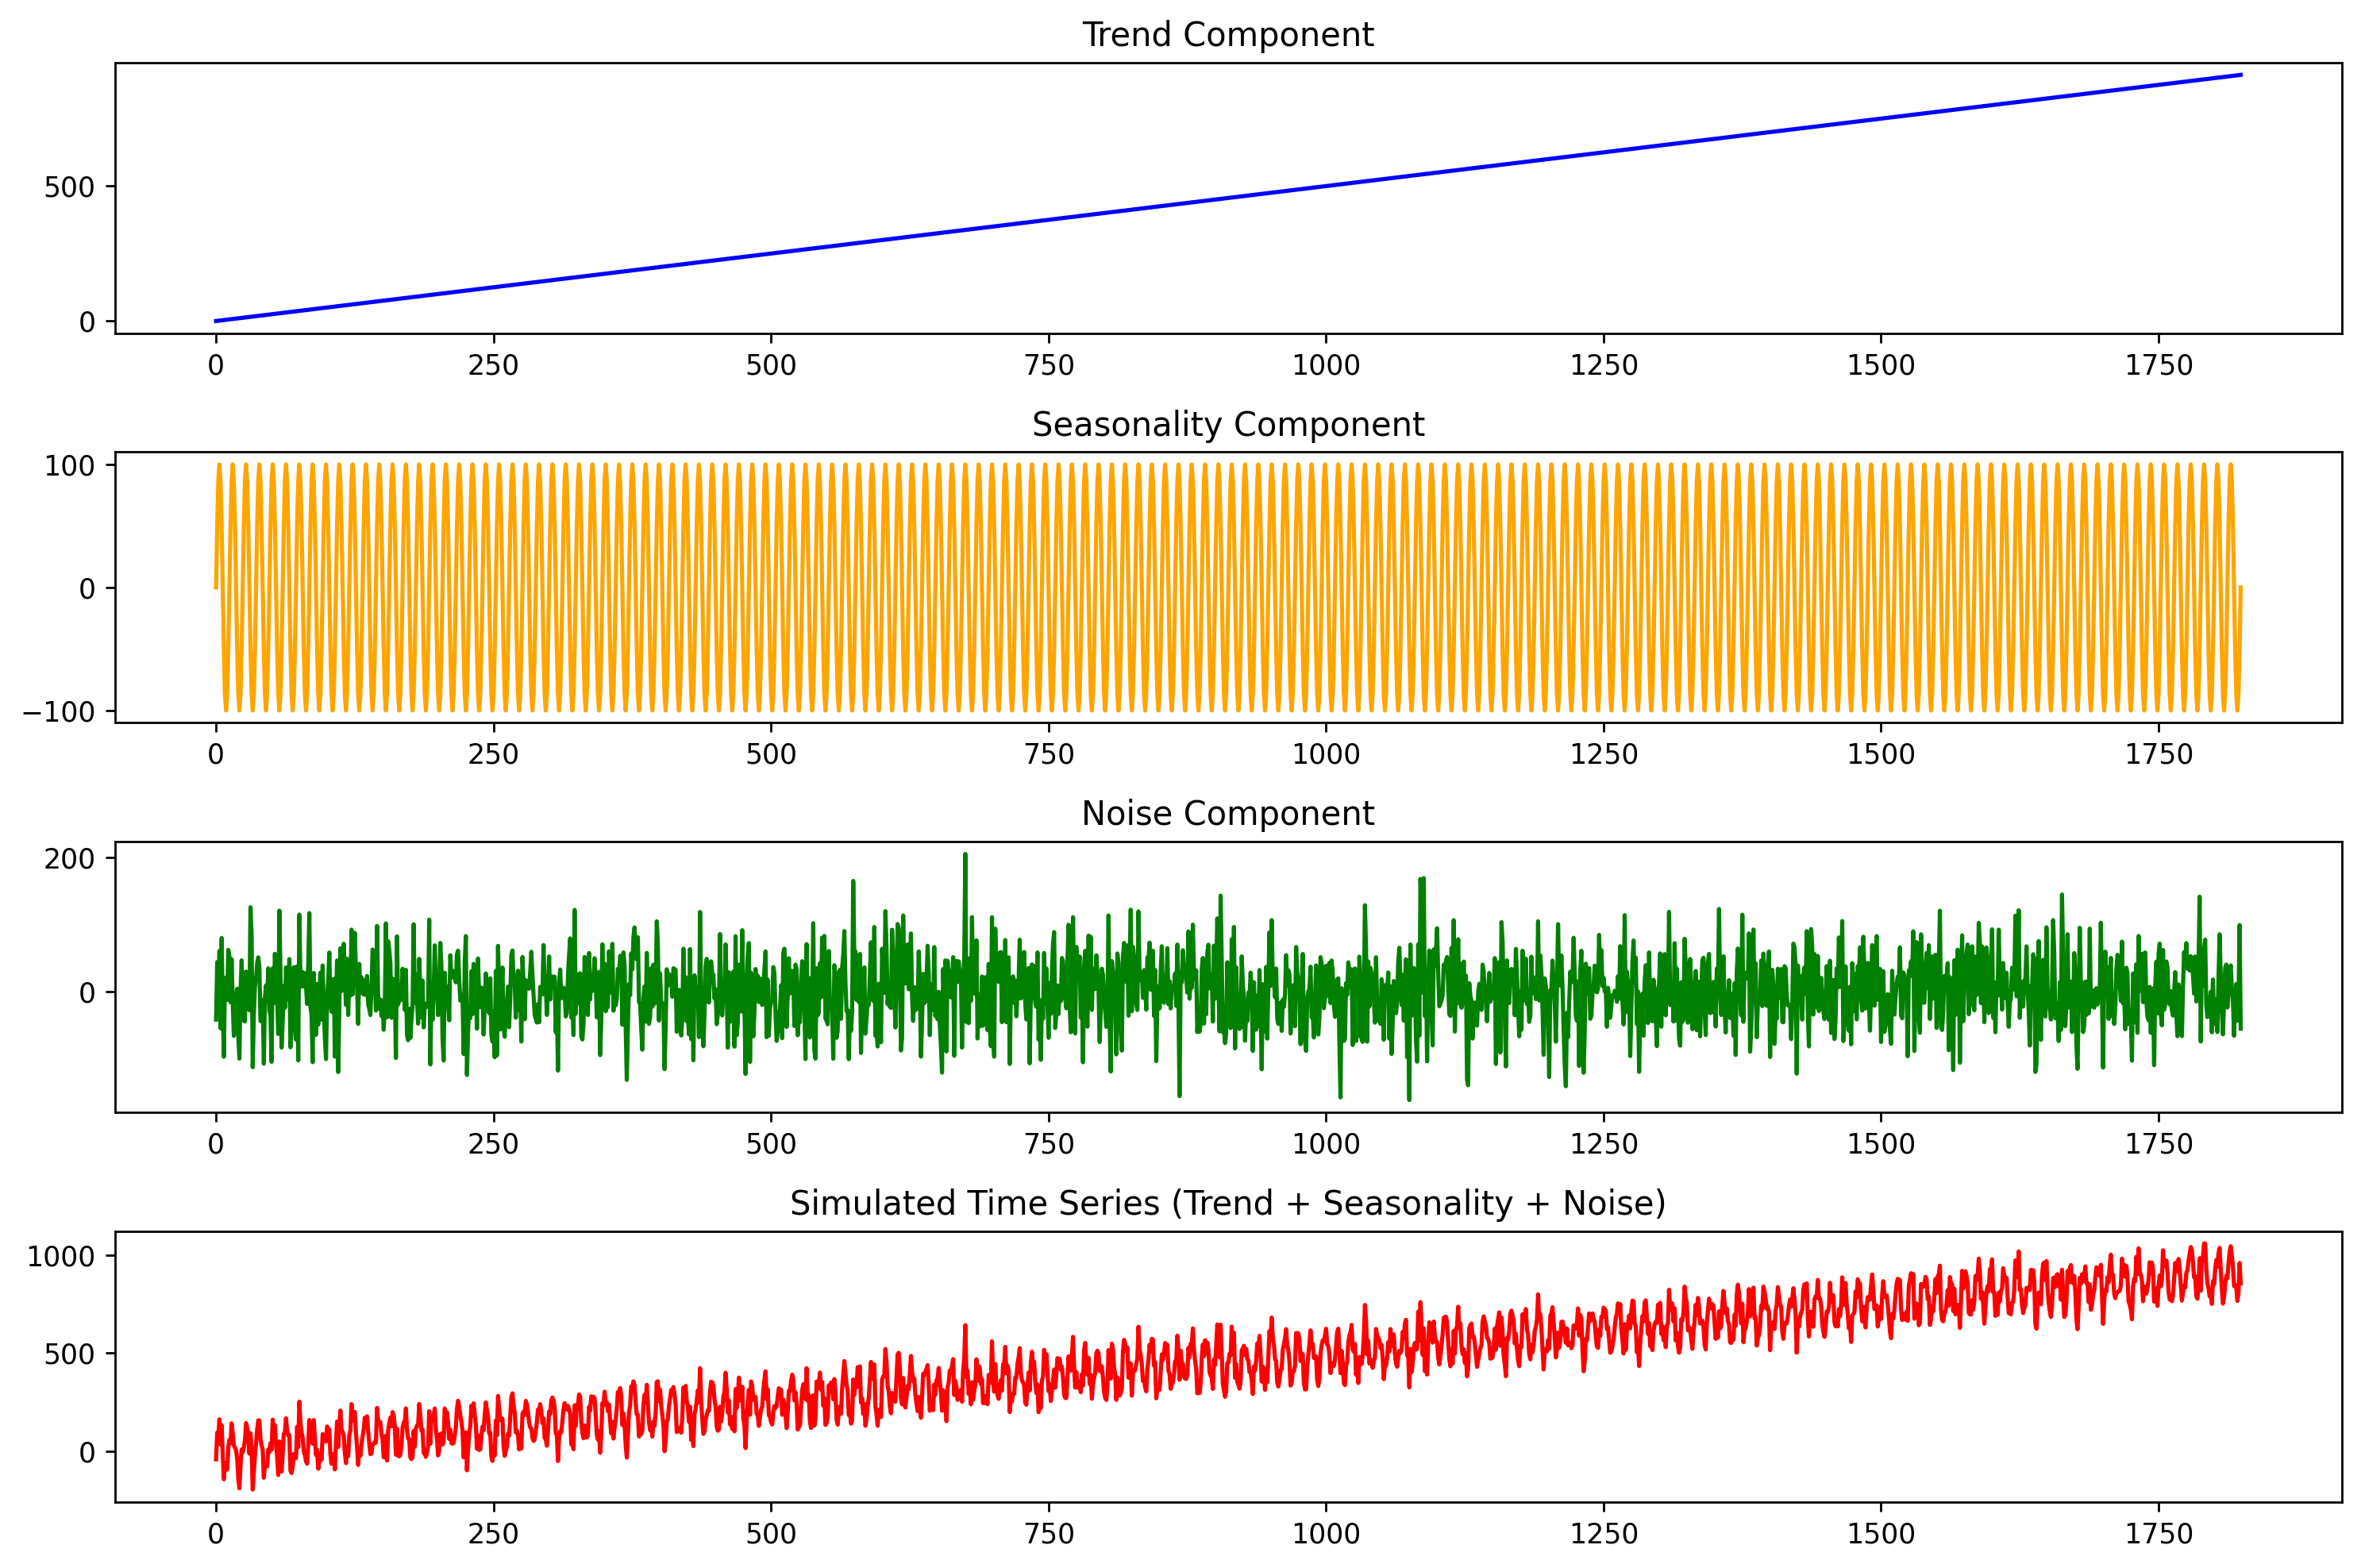

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_series_data = df['Volume'].values
time_index = np.arange(len(time_series_data))

#1. Creating the Trend Component
trend = 0.5 * time_index

# 2. Adding Seasonality Component
# We'll use a sine wave to simulate seasonality;
seasonality = 100 * np.sin(2 * np.pi * time_index / 12)

# 3. Adding Noise Component
# We'll simulate noise with a normal distribution;
noise = np.random.normal(scale=50, size=len(time_index))

# 4. Combine Trend, Seasonality, and Noise
simulated_series = trend + seasonality + noise

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_index, trend, label='Trend', color='blue')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(time_index, seasonality, label='Seasonality', color='orange')
plt.title('Seasonality Component')

plt.subplot(4, 1, 3)
plt.plot(time_index, noise, label='Noise', color='green')
plt.title('Noise Component')

plt.subplot(4, 1, 4)
plt.plot(time_index, simulated_series, label='Simulated Series', color='red')
plt.title('Simulated Time Series (Trend + Seasonality + Noise)')

plt.tight_layout()
plt.show()


#*Summary:*

1-Analyze the Multiple Boxplot of the Dataset: We analyzed the multiple boxplots to understand the distribution and variability of the Istanbul Stock Exchange (ISE) and Facebook Stock data across different months. This helped in identifying trends, outliers, and seasonal patterns, offering insights into how the stock exchange behaves over time.

2-Simulate the Time Series Components from Scratch: We created a synthetic time series by simulating its core components: trend, seasonality, and noise. This process is useful for understanding how these elements interact and for testing models in a controlled environment where the behavior of each component is known.

3-Create Decomposition of Seasonal Component Using Appropriate Model: By decomposing the time series, we isolated the seasonal component to better understand the recurring patterns. This helps in identifying seasonality's influence on the time series, which is crucial for forecasting and analyzing cyclic behavior.

4-Implement Seasonality Decomposition Using the seasonal_decompose() Method: We utilized the seasonal_decompose() method to break down the time series into its trend, seasonal, and residual (noise) components. This method provides a clear view of the underlying structure of the data, making it easier to identify and interpret patterns for better decision-making in analysis and forecasting.
